# Package Import and Data Cleaning

In [1]:
import numpy
import pandas as pd
import sklearn
import autograd.numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('techSalaries2017.csv')
df.dropna(subset=['Race', 'Education'], inplace = True)
X = df[['yearsofexperience', 'yearsatcompany',
       'gender', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 
       'Age', 'Height', 'Zodiac', 'SAT', 'GPA']]
X = pd.get_dummies(X, columns = ['Zodiac', 'gender'])
Y = df[['totalyearlycompensation']]

X_num = X[['yearsofexperience', 'yearsatcompany','Age', 'Height', 'SAT', 'GPA']]
X_norm = (X_num - X_num.mean())/X_num.std()
X_dummy = X.drop(['yearsofexperience', 'yearsatcompany','Age', 'Height', 'SAT', 'GPA'], axis=1)
X = pd.concat([X_norm, X_dummy], axis=1, join='inner')
Y = (Y - Y.mean())/Y.std()

In [3]:
X_dummy.columns

Index(['Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic', 'Zodiac_1', 'Zodiac_2', 'Zodiac_3',
       'Zodiac_4', 'Zodiac_5', 'Zodiac_6', 'Zodiac_7', 'Zodiac_8', 'Zodiac_9',
       'Zodiac_10', 'Zodiac_11', 'Zodiac_12', 'gender_Female', 'gender_Male',
       'gender_Other'],
      dtype='object')

# Question 1
*Using multiple linear regression: What is the best predictor of total annual compensation, how much variance is explained by this predictor vs. the full multiple regression model?*

In [3]:
for (columnName, columnData) in X.iteritems():
    model = LinearRegression().fit(columnData.to_numpy().reshape(-1,1),Y)
    rSqr = model.score(columnData.to_numpy().reshape(-1,1), Y)
    print('{:63s}{:.4f}'.format('r^2 bewteen {:} and total yearly compensation: '.format(columnName), rSqr))

model = LinearRegression().fit(X,Y)
rSqr_multi = model.score(X, Y)
print('{:63s}{:.4f}'.format('r^2 of the multiple regression model is: ', rSqr_multi))

r^2 bewteen yearsofexperience and total yearly compensation:   0.1622
r^2 bewteen yearsatcompany and total yearly compensation:      0.0280
r^2 bewteen Age and total yearly compensation:                 0.0650
r^2 bewteen Height and total yearly compensation:              0.0001
r^2 bewteen SAT and total yearly compensation:                 0.1109
r^2 bewteen GPA and total yearly compensation:                 0.0933
r^2 bewteen Masters_Degree and total yearly compensation:      0.0097
r^2 bewteen Bachelors_Degree and total yearly compensation:    0.0239
r^2 bewteen Doctorate_Degree and total yearly compensation:    0.0196
r^2 bewteen Highschool and total yearly compensation:          0.0002
r^2 bewteen Some_College and total yearly compensation:        0.0002
r^2 bewteen Race_Asian and total yearly compensation:          0.0014
r^2 bewteen Race_White and total yearly compensation:          0.0022
r^2 bewteen Race_Two_Or_More and total yearly compensation:    0.0002
r^2 bewteen Race_Bla

* In the code, I first use linear regression between each predictors and outcome and compute the correlation of determinations; then I use multiple regression model and compute the correlation of determination. Before implementing the model, there are several qualitative variables including Zodiac and gender, I turned them into dummy variables. Also, there are NaN value for race and education. I drop them before implementing the models. Moreover, I normalize the quantatitive variables in the dataset including predictor and outcome.
* By comparing the correlation of determinations, we will be able to tell which predictor is the best. For qualitative variables, they cannot be used directed and need to be turned into dummy variables.
* R square of multiple regression is the largest, 0.2672 among all. R square of the years of experience is the largest among model with single predictor.
* R square can tell us how much variance is explained. For using predictor years of experience, 16.22% of the variance is explained. For using multiple regression, 26.72% of the variance is explained.

# Question 2
*Using ridge regression to do the same as in 1): How does the model change or improve compared to OLS? What is the optimal lambda?*

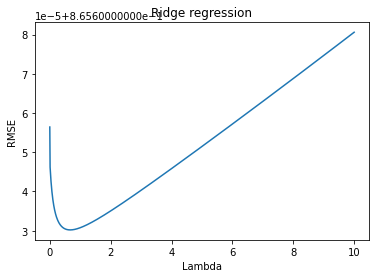

Optimal lambda: 0.6706706706706707
RMSE of linear regression model is:  0.8560397793602196
RMSE of ridge regression model is:  0.8560403875573124
Betas of linear regression model
[[ 3.88940626e-01 -5.79390377e-02 -3.18235607e-03 -6.09592734e-03
   2.58899458e-01  1.38859190e-02 -1.10323092e-01 -2.78374710e-01
   4.23119078e-01 -3.77623362e-01 -3.22710664e-01  7.79406059e-02
   1.06207345e-01  2.04779364e-01  6.55086638e-02  7.59515437e-02
  -2.42161409e-02  5.87966469e-03 -8.75507128e-03 -6.17228534e-03
  -1.30239846e-02  6.29163611e-05 -5.77951979e-03 -2.41393450e-02
   2.04849901e-02 -3.14985498e-02  3.19062474e-02  5.52510781e-02
   1.91672089e-02  5.60690031e-02  2.45058462e-01]]
Betas of ridge regression model
[[ 3.88900577e-01 -5.79223771e-02 -3.15837006e-03 -6.09454821e-03
   2.58872481e-01  1.39164826e-02 -4.01181606e-02 -2.08134778e-01
   4.92997826e-01 -3.06642933e-01 -2.51932072e-01 -3.77727670e-03
   2.44303573e-02  1.22977863e-01 -1.62410480e-02 -5.71777677e-03
  -2.424219

In [4]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.5, random_state=0)
lambdas = np.linspace(0,10,1000)
cont = np.empty([len(lambdas),2])*np.NaN
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

linearModel = LinearRegression().fit(X, Y)
error_linear = mean_squared_error(Y,linearModel.predict(X),squared=False)

ridgeModel = Ridge(alpha=0.6706706706706707).fit(X, Y)
error_ridge = mean_squared_error(Y,ridgeModel.predict(X),squared=False)


print("RMSE of linear regression model is: ", error_linear)
print("RMSE of ridge regression model is: ", error_ridge)
print("Betas of linear regression model")
print(linearModel.coef_)
print("Betas of ridge regression model")
print(ridgeModel.coef_)

* In the code, I first split the data into training set and testing set. Then, I make an array of 1000 different lambdas with the interval 0-10. Then, I calculate each RMSE for different lambda values. Then, I compare the RMSE of linear regression model with RMSE of ridge regression model. Finally, I compare the betas of linear regression model with ridge regression model.
* The optimal lambda should be the one with the least RMSE, thus I find RMSE for different lambdas within 0-10. And use the optimal lambda to build ridge regression model. The betas of implementing ridge regression should have some difference comparing to those of linear regression.
* I found that the RMSE of ridge regression model is slightly larger than that of linear regression model, with optimal lambda: 0.6706706706706707. The absolute values of betas are getting smallers.
* Larger RMSE means more errorous, but since ridge regression alleviates the problem of overfitting, which might give up on minimizing RSS, which might lead to a larger RMSE. Since RMSE only very slightly increases, it will not cause a problem. For some betas, there is a trend of shrinkage, and the others remain unchanged. This means that ridge regression model tends to more centralized than linear regression model, since it alleviates overfitting.

# Question 3
*Using Lasso regression to do the same as in 1): How does the model change now? How many of the predictor betas are shrunk to exactly 0? What is the optimal lambda now?*

<ipython-input-5-a167bb5eb228>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  LassoModel = Lasso(alpha=lambdas[ii]).fit(xTrain, yTrain)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.895e+03, tolerance: 1.076e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

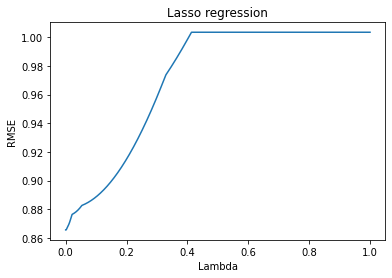

Optimal lambda: 0.001001001001001001
RMSE of linear regression model is:  0.8560397793602196
RMSE of lasso regression model is:  0.856325399222508
Betas of linear regression model
[[ 3.88940626e-01 -5.79390377e-02 -3.18235607e-03 -6.09592734e-03
   2.58899458e-01  1.38859190e-02 -1.10323092e-01 -2.78374710e-01
   4.23119078e-01 -3.77623362e-01 -3.22710664e-01  7.79406059e-02
   1.06207345e-01  2.04779364e-01  6.55086638e-02  7.59515437e-02
  -2.42161409e-02  5.87966469e-03 -8.75507128e-03 -6.17228534e-03
  -1.30239846e-02  6.29163611e-05 -5.77951979e-03 -2.41393450e-02
   2.04849901e-02 -3.14985498e-02  3.19062474e-02  5.52510781e-02
   1.91672089e-02  5.60690031e-02  2.45058462e-01]]
Betas of Lasso regression model
[ 3.84876883e-01 -5.52544140e-02 -2.50108777e-04 -5.24992117e-03
  2.59049447e-01  1.33376540e-02  1.63207262e-01 -0.00000000e+00
  6.77947861e-01 -1.95017236e-02 -0.00000000e+00 -9.46462257e-04
  1.92813572e-02  1.00247372e-01 -0.00000000e+00 -0.00000000e+00
 -8.28036214e-

In [5]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.5, random_state=0)

lambdas = np.linspace(0,1,1000)
cont = np.empty([len(lambdas),2])*np.NaN

for ii in range(len(lambdas)):
    LassoModel = Lasso(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest, LassoModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

LassoModel = Lasso(alpha=0.001001001001001001).fit(X, Y)
error_lasso = mean_squared_error(Y,LassoModel.predict(X),squared=False)

linearModel = LinearRegression().fit(X,Y)
error_linear = mean_squared_error(Y,linearModel.predict(X),squared=False)

print("RMSE of linear regression model is: ", error_linear)
print("RMSE of lasso regression model is: ", error_lasso)

print("Betas of linear regression model")
print(linearModel.coef_)
print("Betas of Lasso regression model")
print(LassoModel.coef_)

* In the code, I first split the data into training set and testing set. Then, I make an array of 1000 different lambdas with the interval 0-10. Then, I calculate each RMSE for different lambda values. Then, I compare the RMSE of linear regression model with RMSE of Lasso regression model. Finally, I compare the betas of linear regression model with Lasso regression model.
* The optimal lambda should be the one with the least RMSE, thus I find RMSE for different lambdas within 0-1 (I tried 0-10, but it turns out lambda is too small to be observed on the graph). And use the optimal lambda to build ridge regression model. The betas of implementing Lasso regression should have some difference comparing to those of linear regression.
* I found that the RMSE of Lasso regression model is slightly larger than that of linear regression model, with optimal lambda 0.001001001001001001. The absolute values of betas are getting smallers, and 11 out of 31 betas shrink to zero
* Larger RMSE means more errorous, but since lasso regression alleviates the problem of overfitting, which might give up on minimizing RSS, which might lead to a larger RMSE. Since RMSE only very slightly increases, it will not cause a problem. For some betas, there is a trend of shrinkage, 11 of all betas shrink to zero, and the others remain unchanged. This means that Lasso regression model tends to more centralized than linear regression model, since it alleviates overfitting.

# Question 4
*There is controversy as to the existence of a male/female gender pay gap in tech job compensation. Build a logistic regression model (with gender as the outcome variable) to see if there is an appreciable beta associated with total annual compensation with and without controlling for other factors.*

In [51]:
df_q4 = X[X['gender_Other'] != 1]['gender_Female']
df_q4  = pd.concat([df_q4 , Y], axis=1, join='inner')
train_data, val_data = model_selection.train_test_split(df_q4 , test_size = 0.2)

X_train = train_data.drop('gender_Female', axis = 1)
X_val  = val_data.drop('gender_Female', axis = 1)
y_train = train_data['gender_Female']
y_val  = val_data['gender_Female']

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train, y_train)
pred = model.predict(X_val)
accuracy = metrics.accuracy_score(y_val, pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))
conf_matrix = metrics.confusion_matrix(y_val, pred)
print("Confusion matrix = ")
print(conf_matrix)
precision = metrics.precision_score(y_val, pred)
print("Precision = {:0.1f}%".format(100 * precision))
recall = metrics.recall_score(y_val, pred)
print("Recall    = {:0.1f}%".format(100 * recall))
print("Beta:", model.coef_)

Accuracy = 46.7%
Confusion matrix = 
[[1506 2005]
 [ 293  511]]
Precision = 20.3%
Recall    = 63.6%
Beta: [[-0.11902283]]


In [52]:
df_q4 = X[['gender_Female', 'yearsofexperience', 'Age', 'Height', 'SAT', 'GPA']]
df_q4  = pd.concat([df_q4 , Y], axis=1, join='inner')
train_data, val_data = model_selection.train_test_split(df_q4 , test_size = 0.2)
X_train = train_data.drop('gender_Female', axis = 1)
X_val  = val_data.drop('gender_Female', axis = 1)
y_train = train_data['gender_Female']
y_val  = val_data['gender_Female']
model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train, y_train)
pred = model.predict(X_val)
accuracy = metrics.accuracy_score(y_val, pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))
conf_matrix = metrics.confusion_matrix(y_val, pred)
print("Confusion matrix = ")
print(conf_matrix)
precision = metrics.precision_score(y_val, pred)
print("Precision = {:0.1f}%".format(100 * precision))
recall = metrics.recall_score(y_val, pred)
print("Recall    = {:0.1f}%".format(100 * recall))
print("Beta:", model.coef_)


Accuracy = 47.8%
Confusion matrix = 
[[1584 1980]
 [ 284  489]]
Precision = 19.8%
Recall    = 63.3%
Beta: [[-0.14801122  0.00655451  0.00728959 -0.00783476  0.00933741 -0.06334451]]


* In the first section, I create a new dataframe with gender female and compensation only. In gender female column, 1 means female, and 0 means male. Then I build a logistic regression model with gender only. In the second section, I I create a new dataframe with gender female, years of experience, age, height, SAT, GPA and compensation only. In gender female column, 1 means female, and 0 means male. Then I build a logistic regression model with these factor.
* Using the code above, we can tell the beta with and without controlling other factors and examine the accuracy of the models.
* The beta of gender only is -0.11902283, the beta of gender with other factors is -0.14801122. The accuracy of model with gender only is 46.7% and the accuracy of model with all these factors is 47.8%.
* We could intepret first beta as controlling gender only an increase of 1 unit in yearly compensation multiplies the odds of being gender female by e^-0.1190 = 0.8878. We could intepret second beta as with all other factors together, an increase of 1 unit in yearly compensation multiplies the odds of being gender female by e^-0.1480 = 0.8624. With or without controlling other factors, it appears that an individual with higher yearly compensation will have more chance to be male. But there are something else we need to notice. First, the accuracies of both model are not very accurate, we cannot make any conclusion. Second, if there is an conclusion with similer beta, 1 unit increase of yearly compensation is not a small number since data had been normalized.

# Question 5
*Build a logistic regression model to see if you can predict high and low pay from years of relevant experience, age, height, SAT score and GPA, respectively.*

In [61]:
df_q5 = X[['yearsofexperience']]
df_q5 = pd.concat([df_q5, Y], axis=1, join='inner')
threshold = int(Y.median())
df_q5['highorlow'] = np.where(df_q5['totalyearlycompensation'] >= threshold, 1, 0)
df_q5.drop('totalyearlycompensation',axis=1, inplace = True)

train_data, val_data = model_selection.train_test_split(df_q5, test_size = 0.2) 
train_data
X_train = train_data.drop('highorlow', axis = 1)
X_val  = val_data.drop('highorlow', axis = 1)
y_train = train_data['highorlow']
y_val  = val_data['highorlow']

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train, y_train)

print("Years of experience")
pred = model.predict(X_val)
accuracy = metrics.accuracy_score(y_val, pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))
conf_matrix = metrics.confusion_matrix(y_val, pred)
print("Confusion matrix = ")
print(conf_matrix)
precision = metrics.precision_score(y_val, pred)
print("Precision = {:0.1f}%".format(100 * precision))
recall = metrics.recall_score(y_val, pred)
print("Recall    = {:0.1f}%".format(100 * recall))
print("Beta:", model.coef_)
print()
##
df_q5 = X[['Age']]
df_q5 = pd.concat([df_q5, Y], axis=1, join='inner')
threshold = int(Y.median())
df_q5['highorlow'] = np.where(df_q5['totalyearlycompensation'] >= threshold, 1, 0)
df_q5.drop('totalyearlycompensation',axis=1, inplace = True)

train_data, val_data = model_selection.train_test_split(df_q5, test_size = 0.2) 
train_data
X_train = train_data.drop('highorlow', axis = 1)
X_val  = val_data.drop('highorlow', axis = 1)
y_train = train_data['highorlow']
y_val  = val_data['highorlow']

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train, y_train)

print("Age")
pred = model.predict(X_val)
accuracy = metrics.accuracy_score(y_val, pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))
conf_matrix = metrics.confusion_matrix(y_val, pred)
print("Confusion matrix = ")
print(conf_matrix)
precision = metrics.precision_score(y_val, pred)
print("Precision = {:0.1f}%".format(100 * precision))
recall = metrics.recall_score(y_val, pred)
print("Recall    = {:0.1f}%".format(100 * recall))
print("Beta:", model.coef_)
print()
##
df_q5 = X[['Height']]
df_q5 = pd.concat([df_q5, Y], axis=1, join='inner')
threshold = int(Y.median())
df_q5['highorlow'] = np.where(df_q5['totalyearlycompensation'] >= threshold, 1, 0)
df_q5.drop('totalyearlycompensation',axis=1, inplace = True)

train_data, val_data = model_selection.train_test_split(df_q5, test_size = 0.2) 
train_data
X_train = train_data.drop('highorlow', axis = 1)
X_val  = val_data.drop('highorlow', axis = 1)
y_train = train_data['highorlow']
y_val  = val_data['highorlow']

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train, y_train)

print("Height")
pred = model.predict(X_val)
accuracy = metrics.accuracy_score(y_val, pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))
conf_matrix = metrics.confusion_matrix(y_val, pred)
print("Confusion matrix = ")
print(conf_matrix)
precision = metrics.precision_score(y_val, pred)
print("Precision = {:0.1f}%".format(100 * precision))
recall = metrics.recall_score(y_val, pred)
print("Recall    = {:0.1f}%".format(100 * recall))
print("Beta:", model.coef_)
print()
##
df_q5 = X[['SAT']]
df_q5 = pd.concat([df_q5, Y], axis=1, join='inner')
threshold = int(Y.median())
df_q5['highorlow'] = np.where(df_q5['totalyearlycompensation'] >= threshold, 1, 0)
df_q5.drop('totalyearlycompensation',axis=1, inplace = True)

train_data, val_data = model_selection.train_test_split(df_q5, test_size = 0.2) 
train_data
X_train = train_data.drop('highorlow', axis = 1)
X_val  = val_data.drop('highorlow', axis = 1)
y_train = train_data['highorlow']
y_val  = val_data['highorlow']

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train, y_train)

print("SAT")
pred = model.predict(X_val)
accuracy = metrics.accuracy_score(y_val, pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))
conf_matrix = metrics.confusion_matrix(y_val, pred)
print("Confusion matrix = ")
print(conf_matrix)
precision = metrics.precision_score(y_val, pred)
print("Precision = {:0.1f}%".format(100 * precision))
recall = metrics.recall_score(y_val, pred)
print("Recall    = {:0.1f}%".format(100 * recall))
print("Beta:", model.coef_)
print()
##
df_q5 = X[['GPA']]
df_q5 = pd.concat([df_q5, Y], axis=1, join='inner')
threshold = int(Y.median())
df_q5['highorlow'] = np.where(df_q5['totalyearlycompensation'] >= threshold, 1, 0)
df_q5.drop('totalyearlycompensation',axis=1, inplace = True)

train_data, val_data = model_selection.train_test_split(df_q5, test_size = 0.2) 
train_data
X_train = train_data.drop('highorlow', axis = 1)
X_val  = val_data.drop('highorlow', axis = 1)
y_train = train_data['highorlow']
y_val  = val_data['highorlow']

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train, y_train)

print("GPA")
pred = model.predict(X_val)
accuracy = metrics.accuracy_score(y_val, pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))
conf_matrix = metrics.confusion_matrix(y_val, pred)
print("Confusion matrix = ")
print(conf_matrix)
precision = metrics.precision_score(y_val, pred)
print("Precision = {:0.1f}%".format(100 * precision))
recall = metrics.recall_score(y_val, pred)
print("Recall    = {:0.1f}%".format(100 * recall))
print("Beta:", model.coef_)


Years of experience
Accuracy = 66.3%
Confusion matrix = 
[[1911  660]
 [ 801  965]]
Precision = 59.4%
Recall    = 54.6%
Beta: [[0.86655938]]

Age
Accuracy = 56.4%
Confusion matrix = 
[[1486 1147]
 [ 742  962]]
Precision = 45.6%
Recall    = 56.5%
Beta: [[0.49145841]]

Height
Accuracy = 50.9%
Confusion matrix = 
[[1334 1271]
 [ 860  872]]
Precision = 40.7%
Recall    = 50.3%
Beta: [[-0.01996725]]

SAT
Accuracy = 60.0%
Confusion matrix = 
[[1506 1103]
 [ 630 1098]]
Precision = 49.9%
Recall    = 63.5%
Beta: [[0.53049022]]

GPA
Accuracy = 57.9%
Confusion matrix = 
[[1433 1190]
 [ 637 1077]]
Precision = 47.5%
Recall    = 62.8%
Beta: [[0.47362034]]


* In the code, I first create several new dataframes containing years of experience, age, height, SAT, GPA, and total yearly compensation. The I turn total yearly compensation into dummy variables based on median and drop the numerical total yearly compensation column. For the dummy column, 1 means above or equal to the median which is high, and 0 means lower than the median which is low. Then I build a logistic regression model use data upon.
* Median is a good thresold to determine high and low compensation and make the numerical compensation into dummy variables since we cannot directly use the numbers.
* The logistic regression models with predictors have the following accuracy and precision:
    * Years of experience:
        * Accuracy: 66.3%
        * Precision: 59.4%
    * Age:
        * Accuracy: 56.4%
        * Precision: 45.6%
    * Height:
        * Accuracy: 50.9%
        * Precision: 40.7%
    * SAT:
        * Accuracy: 60.0%
        * Precision: 49.9%
    * GPA:
        * Accuracy: 57.9%
        * Precision: 47.5%
* We can tell years of experience can most accurately indicate whether yearly compensation is high or low, and height can least accurately indicate whether yearly compensation is high or low.

# Extra A
*Is salary, height or age normally distributed? Does this surprise you? Why or why not?*

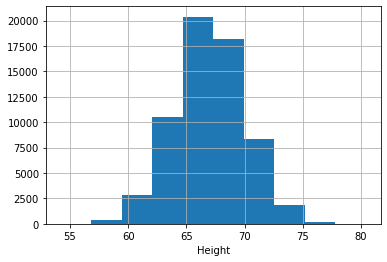

In [69]:
df["Height"].hist()
plt.xlabel('Height')
plt.show()

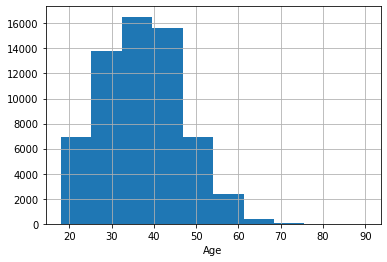

In [70]:
df["Age"].hist()
plt.xlabel('Age')
plt.show()

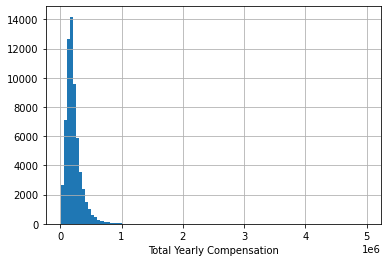

In [71]:
df["totalyearlycompensation"].hist(bins = 100)
plt.xlabel('Total Yearly Compensation')
plt.show()

* In the code, I make three histograms of height, age, and total yearly compensation.
* We can tell if the distribution is normal by observing the histograms.
* Height is normally distributed. Age and total yearly compensation are not. More people are with in 25-45; the distribution is right skewed. More people are paid less; only a few people have super high compensation; the graph is right skewed as well.
* I was not suprised, since compare to traditional industries, more technology industries are just emerging, it makes sense that there are more young people. And for the salary, it also makes that the majority of the people are on a mediocre level, and few have super high salary.

# Extra B
*Tell us something interesting about this dataset that is not already covered by the questions above and that is not obvious.*

In [74]:
print(X['gender_Male'].sum())
print(X['gender_Female'].sum())
print(X['gender_Other'].sum())

17605
3880
106


Zodiac_1     1843
Zodiac_2     1781
Zodiac_3     1825
Zodiac_4     1811
Zodiac_5     1796
Zodiac_6     1848
Zodiac_7     1837
Zodiac_8     1780
Zodiac_9     1812
Zodiac_10    1780
Zodiac_11    1752
Zodiac_12    1816
dtype: int64
1848


<AxesSubplot:>

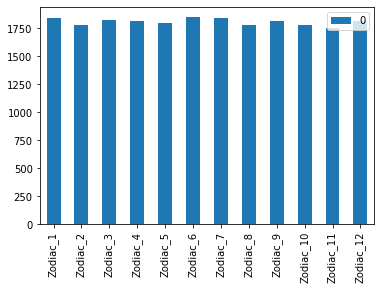

In [98]:
Zod = X[['Zodiac_1', 'Zodiac_2', 'Zodiac_3',
       'Zodiac_4', 'Zodiac_5', 'Zodiac_6', 'Zodiac_7', 'Zodiac_8', 'Zodiac_9',
       'Zodiac_10', 'Zodiac_11', 'Zodiac_12']].sum()
print(Zod)
Zod = pd.DataFrame(Zod)
Zod.plot.bar()

* In the dataset, most of the individuals are males, approximately 5 times more than the number of females.
* The Zodiac signs are pretty average. Zodiac 6 ♍︎ is the majority with 1848.